In [0]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jan  7 12:32:05 2019

@author: Krishna
"""
# Importing neccessary packages
import h5py
import tensorflow as tf
import numpy as np
import os
import nibabel as nib
import cv2 as cv
import matplotlib.pyplot as plt

# Setting the path
Path='drive/My Drive/Pre-processed'
p=os.listdir(Path)

X_Dp=[]          
X_Gado=[]
X_Flair=[]      
X_T1=[]
X_T2=[]
Y_Man1=[]

X=[]
Y1=[]

# Loading the MRI Scans 
for i in p[0:14] :
    
    q=os.listdir(os.path.join(Path,i))  
    
    x=nib.load(os.path.join(Path,i,q[0]))         
    f_Dp=x.get_fdata()
    f_Dp=np.asarray(f_Dp,'float32')
    for j in range(f_Dp.shape[2]):
        slice_Dp=cv.resize(f_Dp[:,:,j],(256,256),interpolation=cv.INTER_AREA)
        if(np.sum(slice_Dp)!=0):
          #  slice_Dp=slice_Dp/(np.max(slice_Dp)+0.00001)
            slice_Dp=(slice_Dp-np.mean(slice_Dp)+0.00001)/(np.std(slice_Dp)+0.00001)
        X_Dp.append(slice_Dp)
    
      
    
    x=nib.load(os.path.join(Path,i,q[1]))
    f_Flair=x.get_fdata()
    f_Flair=np.asarray(f_Flair,'float32')
    for j in range(f_Flair.shape[2]):
        slice_Flair=cv.resize(f_Flair[:,:,j],(256,256),interpolation=cv.INTER_AREA)
        if(np.sum(slice_Flair)!=0):
           # slice_Flair=slice_Flair/(np.max(slice_Flair)+0.00001)
            slice_Flair=(slice_Flair-np.mean(slice_Flair)+0.00001)/(np.std(slice_Flair)+0.00001)
        X_Flair.append(slice_Flair)
    
    
    x=nib.load(os.path.join(Path,i,q[2]))
    f_Gado=x.get_fdata()
    f_Gado=np.asarray(f_Gado,'float32')
    for j in range(f_Gado.shape[2]):
        slice_Gado=cv.resize(f_Gado[:,:,j],(256,256),interpolation=cv.INTER_AREA)
        if(np.sum(slice_Gado)!=0):
           # slice_Gado=slice_Gado/(np.max(slice_Gado)+0.00001)
            slice_Gado=(slice_Gado-np.mean(slice_Gado)+0.00001)/(np.std(slice_Gado)+0.00001)
        X_Gado.append(slice_Gado)
    
    
    x=nib.load(os.path.join(Path,i,q[3]))
    f_Man1=x.get_fdata()
    f_Man1=np.asarray(f_Man1,'float32')
    for j in range(f_Man1.shape[2]):
        slice_Man1=cv.resize(f_Man1[:,:,j],(256,256),interpolation=cv.INTER_AREA)
        slice_Man1=np.array(slice_Man1)
        slice_Man1[slice_Man1 > 0] = 1.0
        Y_Man1.append(slice_Man1)
    
    x=nib.load(os.path.join(Path,i,q[10]))
    f_T1=x.get_fdata()
    f_T1=np.asarray(f_T1,'float32')
    for j in range(f_T1.shape[2]):
        slice_T1=cv.resize(f_T1[:,:,j],(256,256),interpolation=cv.INTER_AREA)
        if(np.sum(slice_T1)!=0):
        #    slice_T1=slice_T1/(np.max(slice_T1)+0.00001)
            slice_T1=(slice_T1-np.mean(slice_T1)+0.00001)/(np.std(slice_T1)+0.00001)
        X_T1.append(slice_T1)
    
    
    x=nib.load(os.path.join(Path,i,q[11]))
    f_T2=x.get_fdata()
    f_T2=np.asarray(f_T2,'float32')
    for j in range(f_T2.shape[2]):
        slice_T2=cv.resize(f_T2[:,:,j],(256,256),interpolation=cv.INTER_AREA)
        if(np.sum(slice_T2)!=0):
         #   slice_T2=slice_T2/(np.max(slice_T2)+0.00001)
            slice_T2=(slice_T2-np.mean(slice_T2)+0.00001)/(np.std(slice_T2)+0.00001)
        X_T2.append(slice_T2)

for i in range(len(X_Dp)):
    X_Dp[i]=X_Dp[i].T
    X_Flair[i]=X_Flair[i].T
    X_Gado[i]=X_Gado[i].T
    X_T1[i]=X_T1[i].T
    X_T2[i]=X_T2[i].T
    Y_Man1[i]=Y_Man1[i].T


for i in range(len(X_Dp)):
    slice_Dp=X_Dp[i]
    slice_Dp=slice_Dp[:,:,np.newaxis]
    
    slice_Flair=X_Flair[i]
    slice_Flair=slice_Flair[:,:,np.newaxis]
    
    slice_Gado=X_Gado[i]
    slice_Gado=slice_Gado[:,:,np.newaxis]
    
    slice_T1=X_T1[i]
    slice_T1=slice_T1[:,:,np.newaxis]
    
    slice_T2=X_T2[i]
    slice_T2=slice_T2[:,:,np.newaxis]
    
    final_slice=np.concatenate((slice_Dp,slice_Flair,slice_Gado,slice_T1,slice_T2),axis=-1)
    
    if(np.sum(final_slice)!=0):
        X.append(final_slice)
        Y1.append(Y_Man1[i])

        
        
X=np.array(X,dtype='float32')
Y1=np.array(Y1,dtype='float32')


Y1=Y1[:,:,:,np.newaxis]


#np.save("X",X)
#np.save("Y",Y1)
#
#X = np.load("G:/Multiple Scelerosis/load_data/X.npy")
#Y = np.load("G:/Multiple Scelerosis/load_data/Y.npy")

with h5py.File('preprocessed_axial_data.h5', 'w') as hf:

    hf.create_dataset('input_X', data=X[:])
    hf.create_dataset('Manual_1', data=Y1[:])

#    
with h5py.File('inputs_no_null.h5', 'w') as hf:

    hf.create_dataset('Dp', data=X_Dp[:])
    hf.create_dataset('Flair', data=X_Flair[:])
    hf.create_dataset('Gado', data=X_Gado[:])
    hf.create_dataset('T1', data=X_T1[:]) 
    hf.create_dataset('T2', data=X_T2[:])
  #  hf.create_dataset('Y_Dp', data=Y_Dp[:])
   # hf.create_dataset('Y_Flair', data=Y_Flair[:])
   # hf.create_dataset('Y_Gado', data=Y_Gado[:])
#    hf.create_dataset('Y_T1', data=Y_T1[:]) 
 #   hf.create_dataset('Y_T2', data=Y_T2[:])
    
        


    

    

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 13 18:56:04 2019

@author: Krishna Chandra
"""
import tensorflow as tf
import keras
from keras.models import Model, load_model
from keras.layers import Input ,BatchNormalization , Activation 
from keras.layers.convolutional import Conv2D, UpSampling2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate


def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x) 
    return x

def model(input_shape):
    
    inputs = Input((input_shape))
    
    conv_1 = Convolution(inputs,32)
    maxp_1 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_1)
    
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_2)
    
    conv_3 = Convolution(maxp_2,128)
    maxp_3 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_3)
    
    conv_4 = Convolution(maxp_3,256)
    maxp_4 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_4)
    
    conv_5 = Convolution(maxp_4,512)
    upsample_6 = UpSampling2D((2, 2)) (conv_5)
    
    conv_6 = Convolution(upsample_6,256)
    upsample_7 = UpSampling2D((2, 2)) (conv_6)
    
    upsample_7 = concatenate([upsample_7, conv_3])
    
    conv_7 = Convolution(upsample_7,128)
    upsample_8 = UpSampling2D((2, 2)) (conv_7)
    
    conv_8 = Convolution(upsample_8,64)
    upsample_9 = UpSampling2D((2, 2)) (conv_8)
    
    upsample_9 = concatenate([upsample_9, conv_1])
    
    conv_9 = Convolution(upsample_9,32)
    outputs = Conv2D(1, (1, 1), activation='sigmoid') (conv_9)
    
    model = Model(inputs=[inputs], outputs=[outputs]) 
    
    return model



In [0]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jan  7 12:32:05 2019

@author: Krishna
"""
# Importing neccessary packages
import h5py
import tensorflow as tf
import numpy as np
import os
import nibabel as nib
import cv2 as cv
import matplotlib.pyplot as plt

def process():
# Setting the path
    Path='drive/My Drive/Pre-processed'
    p=os.listdir(Path)

    X_Dp=[]          
    X_Gado=[]
    X_Flair=[]      
    X_T1=[]
    X_T2=[]
    Y_Man1=[]

    X=[]
    Y1=[]

# Loading the MRI Scans 
    for i in p[0:14] :
    
        q=os.listdir(os.path.join(Path,i))  
    
        x=nib.load(os.path.join(Path,i,q[0]))         
        f_Dp=x.get_fdata()
        f_Dp=np.asarray(f_Dp,'float32')
        for j in range(f_Dp.shape[2]):
            slice_Dp=cv.resize(f_Dp[:,:,j],(256,256),interpolation=cv.INTER_AREA)
            if(np.sum(slice_Dp)!=0):
          #  slice_Dp=slice_Dp/(np.max(slice_Dp)+0.00001)
                slice_Dp=(slice_Dp-np.mean(slice_Dp)+0.00001)/(np.std(slice_Dp)+0.00001)
            X_Dp.append(slice_Dp)
    
      
    
        x=nib.load(os.path.join(Path,i,q[1]))
        f_Flair=x.get_fdata()
        f_Flair=np.asarray(f_Flair,'float32')
        for j in range(f_Flair.shape[2]):
            slice_Flair=cv.resize(f_Flair[:,:,j],(256,256),interpolation=cv.INTER_AREA)
            if(np.sum(slice_Flair)!=0):
           # slice_Flair=slice_Flair/(np.max(slice_Flair)+0.00001)
                slice_Flair=(slice_Flair-np.mean(slice_Flair)+0.00001)/(np.std(slice_Flair)+0.00001)
            X_Flair.append(slice_Flair)
    
    
        x=nib.load(os.path.join(Path,i,q[2]))
        f_Gado=x.get_fdata()
        f_Gado=np.asarray(f_Gado,'float32')
        for j in range(f_Gado.shape[2]):
            slice_Gado=cv.resize(f_Gado[:,:,j],(256,256),interpolation=cv.INTER_AREA)
            if(np.sum(slice_Gado)!=0):
           # slice_Gado=slice_Gado/(np.max(slice_Gado)+0.00001)
                slice_Gado=(slice_Gado-np.mean(slice_Gado)+0.00001)/(np.std(slice_Gado)+0.00001)
            X_Gado.append(slice_Gado)
    
    
        x=nib.load(os.path.join(Path,i,q[3]))
        f_Man1=x.get_fdata()
        f_Man1=np.asarray(f_Man1,'float32')
        for j in range(f_Man1.shape[2]):
            slice_Man1=cv.resize(f_Man1[:,:,j],(256,256),interpolation=cv.INTER_AREA)
            slice_Man1=np.array(slice_Man1)
            slice_Man1[slice_Man1 > 0] = 1.0
            Y_Man1.append(slice_Man1)
    
        x=nib.load(os.path.join(Path,i,q[10]))
        f_T1=x.get_fdata()
        f_T1=np.asarray(f_T1,'float32')
        for j in range(f_T1.shape[2]):
            slice_T1=cv.resize(f_T1[:,:,j],(256,256),interpolation=cv.INTER_AREA)
            if(np.sum(slice_T1)!=0):
        #    slice_T1=slice_T1/(np.max(slice_T1)+0.00001)
                slice_T1=(slice_T1-np.mean(slice_T1)+0.00001)/(np.std(slice_T1)+0.00001)
            X_T1.append(slice_T1)
    
    
        x=nib.load(os.path.join(Path,i,q[11]))
        f_T2=x.get_fdata()
        f_T2=np.asarray(f_T2,'float32')
        for j in range(f_T2.shape[2]):
            slice_T2=cv.resize(f_T2[:,:,j],(256,256),interpolation=cv.INTER_AREA)
            if(np.sum(slice_T2)!=0):
         #   slice_T2=slice_T2/(np.max(slice_T2)+0.00001)
                slice_T2=(slice_T2-np.mean(slice_T2)+0.00001)/(np.std(slice_T2)+0.00001)
            X_T2.append(slice_T2)

    for i in range(len(X_Dp)):
        X_Dp[i]=X_Dp[i].T
        X_Flair[i]=X_Flair[i].T
        X_Gado[i]=X_Gado[i].T
        X_T1[i]=X_T1[i].T
        X_T2[i]=X_T2[i].T
        Y_Man1[i]=Y_Man1[i].T


    for i in range(len(X_Dp)):
        slice_Dp=X_Dp[i]
        slice_Dp=slice_Dp[:,:,np.newaxis]
    
        slice_Flair=X_Flair[i]
        slice_Flair=slice_Flair[:,:,np.newaxis]
    
        slice_Gado=X_Gado[i]
        slice_Gado=slice_Gado[:,:,np.newaxis]
    
        slice_T1=X_T1[i]
        slice_T1=slice_T1[:,:,np.newaxis]
    
        slice_T2=X_T2[i]
        slice_T2=slice_T2[:,:,np.newaxis]
    
        final_slice=np.concatenate((slice_Dp,slice_Flair,slice_Gado,slice_T1,slice_T2),axis=-1)
    
        if(np.sum(final_slice)!=0):
            X.append(final_slice)
            Y1.append(Y_Man1[i])

        
        
    X=np.array(X,dtype='float32')
    Y1=np.array(Y1,dtype='float32')


    Y1=Y1[:,:,:,np.newaxis]


#np.save("X",X)
#np.save("Y",Y1)
#
#X = np.load("G:/Multiple Scelerosis/load_data/X.npy")
#Y = np.load("G:/Multiple Scelerosis/load_data/Y.npy")

    with h5py.File('preprocessed_axial_data.h5', 'w') as hf:

        hf.create_dataset('input_X', data=X[:])
        hf.create_dataset('Manual_1', data=Y1[:])

#    
    with h5py.File('inputs_no_null.h5', 'w') as hf:

        hf.create_dataset('Dp', data=Dp[:])
        hf.create_dataset('Flair', data=Flair[:])
        hf.create_dataset('Gado', data=Gado[:])
        hf.create_dataset('T1', data=T1[:]) 
        hf.create_dataset('T2', data=T2[:])
     #   hf.create_dataset('Y_Dp', data=Y_Dp[:])
      #  hf.create_dataset('Y_Flair', data=Y_Flair[:])
       # hf.create_dataset('Y_Gado', data=Y_Gado[:])
       # hf.create_dataset('Y_T1', data=Y_T1[:]) 
       # hf.create_dataset('Y_T2', data=Y_T2[:])
    
        


    

    

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 13 18:52:08 2019

@author: Krishna Chandra
"""

from keras import backend as K
import numpy as np
import tensorflow as tf

# Computing Dice_Coefficient
def dice_coef(y_true, y_pred, smooth=1.0):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# Computing Precision 
def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

# Computing Sensitivity      
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

# Computing Specificity
def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

Using TensorFlow backend.


In [0]:
import tensorflow as tf
import numpy as np
import os
import nibabel as nib
import cv2 as cv
import matplotlib.pyplot as plt
    
def modality(Path,index):
    X = []
    p=os.listdir(Path) 

    for i in p[:14]:                                                                      # Loading all the folders in the given path
        q = os.listdir(os.path.join(Path,i))     

        x = nib.load(os.path.join(Path,i,q[index]))         
        f = x.get_fdata()
        f = np.asarray(f,'float32')
        
        for j in range(f.shape[2]):                                                        # Processing the MRI Scan in the axial view
            _slice = cv.resize(f[:,:,j],(256,256),interpolation=cv.INTER_NEAREST)             # Resizing the slice to the shape(256,256)
            if(index != 3 and np.sum(_slice) != 0 ):                                           # To check whether the slice is null or not
              #  _slice = _slice / (np.max(_slice) + 0.00001)                               # Normalization
                _slice = (_slice - np.mean(_slice) + 0.00001) / (np.std(_slice) + 0.00001) # Standardization
            elif(index == 3):   # if index = 3, Then it is output mask and we don't normalize or standardize it 
                _slice = np.array(_slice)
                _slice[_slice > 0] = 1.0
            _slice = _slice.T
            _slice = _slice[:,:,np.newaxis]
            X.append(_slice)
    return X

# Removing the null samples as it contains no information
def remove_null_samples(X_Dp, X_Flair, X_Gado, X_T1, X_T2, Y_Manual): 
     
    X=[]
    Y=[]
    
    for i in range(len(X_Dp)):        
        final_slice = np.concatenate((X_Dp[i],X_Flair[i],X_Gado[i],X_T1[i],X_T2[i]), axis = -1)
        if(np.sum(final_slice) != 0):        # checking whether the final slice is empty or not             
            X.append(final_slice)
            Y.append(Y_Manual[i])
 
#   Converting the list into array  
    X=np.array(X,dtype='float32')
    Y=np.array(Y,dtype='float32')
    
    return X,Y

#   To store the data in numpy format    
def store_data(X,Y):
    np.save("X.npy",X)
    np.save("Y.npy",Y)


        

In [0]:
"""
Created on Fri Dec 13 21:23:59 2019
@author: Krishna Chandra
"""


import numpy as np
import matplotlib.pyplot as plt

# Accuracy vs Epoch
def Accuracy_Graph(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    #plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
    
# Dice Similarity Coefficient vs Epoch
def Dice_coefficient_Graph(history):

    plt.plot(history.history['dice_coef'])
    plt.plot(history.history['val_dice_coef'])
    #plt.title('Dice_Coefficient')
    plt.ylabel('Dice_Coefficient')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
# Loss vs Epoch
def Loss_Graph(history):

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    #plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 13 20:18:06 2019

@author: Krishna Chandra
"""



import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


#import dataPrepare as process
# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual SegmentationX_Dp      =   modality(Path,0)
#import Modified_UNet 
#import plots
#import Metrics

# Setting the path
Path='drive/My Drive/Pre-processed'



# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual Segmentation
X_Dp      =   modality(Path,0)
X_Flair   =   modality(Path,1)
X_Gado    =   modality(Path,2)
X_T1      =   modality(Path,10)
X_T2      =   modality(Path,11)
Y_Manual  =   modality(Path,3)

# Removing the null samples and concatenating the 5 modalities along the 3rd dimension
X, Y = remove_null_samples(X_Dp, X_Flair, X_Gado, X_T1, X_T2, Y_Manual)


# Splitting the Whole data into Training and Testing data
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=32)

# Loding the modified U-net 
model = model(input_shape = (256,256,5))
model.summary()

checkpointer = ModelCheckpoint('Modified_UNet.h5', verbose=1)
callback_list=[checkpointer]

# Compiling the model
k_adam=Adam(lr=0.001)
model.compile(optimizer=k_adam, loss='binary_crossentropy', metrics=['accuracy',dice_coef,precision,sensitivity,specificity])
# Fitting the model over the data
history = model.fit(X_train,Y_train,batch_size=32,epochs=60,validation_split=0.20,verbose=1,initial_epoch=0,callbacks=callback_list)

# Saving the model
model.save('Modified_UNet.h5')
history.history

# Evaluating the model on the training and testing data 
model.evaluate(x=X_train, y=Y_train, batch_size=32 , verbose=1, sample_weight=None, steps=None)
model.evaluate(x=X_test, y=Y_test, batch_size=32, verbose=1, sample_weight=None, steps=None)

# Plotting the Graphs of Accuracy, Dice_coefficient, Loss at each epoch on Training and Testing data
#Accuarcy_Graph(history)
#Dice_coefficient_Graph(history)
#Loss_Graph(history)













Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 5) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 1472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 32) 0           batch_normalization[0][0]        
_____________

[0.0037227980005861074,
 0.99886024,
 0.8301803,
 0.87719697,
 0.85485375,
 0.99949354]

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Accuracy vs Epoch
def Accuracy_Graph(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    #plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
    
# Dice Similarity Coefficient vs Epoch
def Dice_coefficient_Graph(history):

    plt.plot(history.history['dice_coef'])
    plt.plot(history.history['val_dice_coef'])
    #plt.title('Dice_Coefficient')
    plt.ylabel('Dice_Coefficient')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
# Loss vs Epoch
def Loss_Graph(history):

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    #plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
Accuracy_Graph(history)
Dice_coefficient_Graph(history)
Loss_Graph(history)


NameError: ignored

In [0]:
import tensorflow as tf
import numpy as np
import os
import nibabel as nib
import cv2 as cv
import matplotlib.pyplot as plt
    
def modality(Path,index):
    X = []
    p=os.listdir(Path) 

    for i in p[:14]:                                                                      # Loading all the folders in the given path
        q = os.listdir(os.path.join(Path,i))     

        x = nib.load(os.path.join(Path,i,q[index]))         
        f = x.get_fdata()
        f = np.asarray(f,'float32')
        
        for j in range(f.shape[2]):                                                        # Processing the MRI Scan in the axial view
            _slice = cv.resize(f[:,:,j],(256,256),interpolation=cv.INTER_NEAREST)             # Resizing the slice to the shape(256,256)
            if(index != 3 and np.sum(_slice) != 0 ):                                           # To check whether the slice is null or not
              #  _slice = _slice / (np.max(_slice) + 0.00001)                               # Normalization
                _slice = (_slice - np.mean(_slice) + 0.00001) / (np.std(_slice) + 0.00001) # Standardization
            elif(index == 3):   # if index = 3, Then it is output mask and we don't normalize or standardize it 
                _slice = np.array(_slice)
                _slice[_slice > 0] = 1.0
            _slice = _slice.T
            _slice = _slice[:,:,np.newaxis]
            X.append(_slice)
    return X

# Removing the null samples as it contains no information
def remove_null_samples(X_Dp, X_Flair, X_Gado, X_T1, X_T2, Y_Manual): 
     
    X=[]
    Y=[]
    
    for i in range(len(X_Dp)):        
        final_slice = np.concatenate((X_Dp[i],X_Flair[i],X_Gado[i],X_T1[i],X_T2[i]), axis = -1)
        if(np.sum(final_slice) != 0):        # checking whether the final slice is empty or not             
            X.append(final_slice)
            Y.append(Y_Manual[i])
 
#   Converting the list into array  
    X=np.array(X,dtype='float32')
    Y=np.array(Y,dtype='float32')
    
    return X,Y

#   To store the data in numpy format    
def store_data(X,Y):
    np.save("X.npy",X)
    np.save("Y.npy",Y)


        

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 13 18:56:04 2019

@author: Krishna Chandra
"""
import tensorflow as tf
import keras
from keras.models import Model, load_model
from keras.layers import Input ,BatchNormalization , Activation 
from keras.layers.convolutional import Conv2D, UpSampling2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate


def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x) 
    return x

def model(input_shape):
    
    inputs = Input((input_shape))
    
    conv_1 = Convolution(inputs,32)
    
    maxp_1 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_1)
    
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_2)
    
    conv_3 = Convolution(maxp_2,128)
    
    maxp_3 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_3)
    
    conv_4 = Convolution(maxp_3,256)
    maxp_4 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_4)
    
    conv_5 = Convolution(maxp_4,512)
   
    upsample_6 = UpSampling2D((2, 2)) (conv_5)

    upsample_6 = concatenate([upsample_6, conv_4])
    
    conv_6 = Convolution(upsample_6,256)
    upsample_7 = UpSampling2D((2, 2)) (conv_6)
    
    upsample_7 = concatenate([upsample_7, conv_3])
    
    conv_7 = Convolution(upsample_7,128)
    upsample_8 = UpSampling2D((2, 2)) (conv_7)
    
    upsample_8 = concatenate([upsample_8, conv_2])

    conv_8 = Convolution(upsample_8,64)
    upsample_9 = UpSampling2D((2, 2)) (conv_8)
    
    upsample_9 = concatenate([upsample_9, conv_1])
    
    conv_9 = Convolution(upsample_9,32)
    outputs = Conv2D(1, (1, 1), activation='sigmoid') (conv_9)
    
    model = Model(inputs=[inputs], outputs=[outputs]) 
    
    return model




In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 13 20:18:06 2019

@author: Krishna Chandra
"""



import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


#import dataPrepare as process
# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual SegmentationX_Dp      =   modality(Path,0)
#import Modified_UNet 
#import plots
#import Metrics

# Setting the path
Path='drive/My Drive/Pre-processed'



# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual Segmentation
X_Dp      =   modality(Path,0)
X_Flair   =   modality(Path,1)
X_Gado    =   modality(Path,2)
X_T1      =   modality(Path,10)
X_T2      =   modality(Path,11)
Y_Manual  =   modality(Path,3)

# Removing the null samples and concatenating the 5 modalities along the 3rd dimension
X, Y = remove_null_samples(X_Dp, X_Flair, X_Gado, X_T1, X_T2, Y_Manual)


# Splitting the Whole data into Training and Testing data
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=32)

# Loding the modified U-net 
model = model(input_shape = (256,256,5))
model.summary()

checkpointer = ModelCheckpoint('Modified_UNet.h5', verbose=1)
callback_list=[checkpointer]

# Compiling the model
k_adam=Adam(lr=0.001)
model.compile(optimizer=k_adam, loss='binary_crossentropy', metrics=['accuracy',dice_coef,precision,sensitivity,specificity])
# Fitting the model over the data
history = model.fit(X_train,Y_train,batch_size=32,epochs=60,validation_split=0.20,verbose=1,initial_epoch=0,callbacks=callback_list)

# Saving the model
model.save('Modified_UNet.h5')
history.history

# Evaluating the model on the training and testing data 
model.evaluate(x=X_train, y=Y_train, batch_size=32 , verbose=1, sample_weight=None, steps=None)
model.evaluate(x=X_test, y=Y_test, batch_size=32, verbose=1, sample_weight=None, steps=None)

# Plotting the Graphs of Accuracy, Dice_coefficient, Loss at each epoch on Training and Testing data
#Accuarcy_Graph(history)
#Dice_coefficient_Graph(history)
#Loss_Graph(history)













Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 5) 0                                            
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 256, 256, 32) 1472        input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_23 (BatchNo (None, 256, 256, 32) 128         conv2d_25[0][0]                  
__________________________________________________________________________________________________
activation_23 (Activation)      (None, 256, 256, 32) 0           batch_normalization_23[0][0]     
____________________________________________________________________________________________

[0.003964840076534319,
 0.9989239,
 0.84387165,
 0.9197561,
 0.82326454,
 0.99969274]

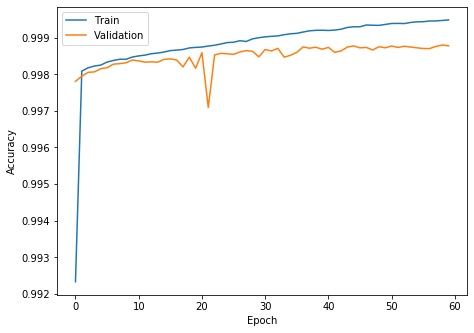

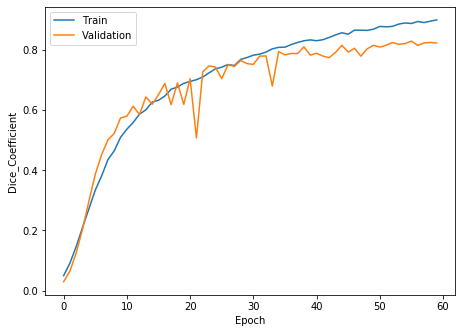

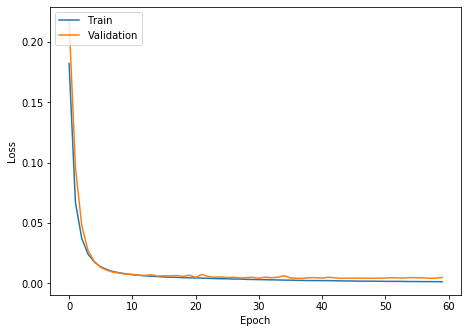

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Accuracy vs Epoch
def Accuracy_Graph(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    #plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
    
# Dice Similarity Coefficient vs Epoch
def Dice_coefficient_Graph(history):

    plt.plot(history.history['dice_coef'])
    plt.plot(history.history['val_dice_coef'])
    #plt.title('Dice_Coefficient')
    plt.ylabel('Dice_Coefficient')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
# Loss vs Epoch
def Loss_Graph(history):

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    #plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
Accuracy_Graph(history)
Dice_coefficient_Graph(history)
Loss_Graph(history)


In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 13 18:56:04 2019

@author: Krishna Chandra
"""
import tensorflow as tf
import keras
from keras.models import Model, load_model
from keras.layers import Input ,BatchNormalization , Activation 
from keras.layers.convolutional import Conv2D, UpSampling2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate


def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x) 
    return x

def model(input_shape):
    
    inputs = Input((input_shape))
    
    conv_1 = Convolution(inputs,32)
    conv_1 = Convolution(conv_1,32)
    
    maxp_1 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_1)
    
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_2)
    
    conv_3 = Convolution(maxp_2,128)
    conv_3 = Convolution(conv_3,128)
    
    maxp_3 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_3)
    
    conv_4 = Convolution(maxp_3,256)
    maxp_4 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_4)
    
    conv_5 = Convolution(maxp_4,512)
    conv_5 = Convolution(conv_5,512)
    upsample_6 = UpSampling2D((2, 2)) (conv_5)

    upsample_6 = concatenate([upsample_6, conv_4])
    
    conv_6 = Convolution(upsample_6,256)
    
    upsample_7 = UpSampling2D((2, 2)) (conv_6)
    
    upsample_7 = concatenate([upsample_7, conv_3])
    
    conv_7 = Convolution(upsample_7,128)
    conv_7 = Convolution(conv_7,128)
    upsample_8 = UpSampling2D((2, 2)) (conv_7)
    
    upsample_8 = concatenate([upsample_8, conv_2])

    conv_8 = Convolution(upsample_8,64)
    upsample_9 = UpSampling2D((2, 2)) (conv_8)
    
    upsample_9 = concatenate([upsample_9, conv_1])
    
    conv_9 = Convolution(upsample_9,32)
    conv_9 = Convolution(conv_9,32)
    outputs = Conv2D(1, (1, 1), activation='sigmoid') (conv_9)
    
    model = Model(inputs=[inputs], outputs=[outputs]) 
    
    return model




In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 13 20:18:06 2019

@author: Krishna Chandra
"""



import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


#import dataPrepare as process
# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual SegmentationX_Dp      =   modality(Path,0)
#import Modified_UNet 
#import plots
#import Metrics

# Setting the path
Path='drive/My Drive/Pre-processed'



# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual Segmentation
X_Dp      =   modality(Path,0)
X_Flair   =   modality(Path,1)
X_Gado    =   modality(Path,2)
X_T1      =   modality(Path,10)
X_T2      =   modality(Path,11)
Y_Manual  =   modality(Path,3)

# Removing the null samples and concatenating the 5 modalities along the 3rd dimension
X, Y = remove_null_samples(X_Dp, X_Flair, X_Gado, X_T1, X_T2, Y_Manual)


# Splitting the Whole data into Training and Testing data
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=32)

# Loding the modified U-net 
model = model(input_shape = (256,256,5))
model.summary()

checkpointer = ModelCheckpoint('Modified_UNet.h5', verbose=1)
callback_list=[checkpointer]

# Compiling the model
k_adam=Adam(lr=0.001)
model.compile(optimizer=k_adam, loss='binary_crossentropy', metrics=['accuracy',dice_coef,precision,sensitivity,specificity])
# Fitting the model over the data
history = model.fit(X_train,Y_train,batch_size=32,epochs=60,validation_split=0.20,verbose=1,initial_epoch=0,callbacks=callback_list)

# Saving the model
model.save('Modified_UNet.h5')
history.history

# Evaluating the model on the training and testing data 
model.evaluate(x=X_train, y=Y_train, batch_size=32 , verbose=1, sample_weight=None, steps=None)
model.evaluate(x=X_test, y=Y_test, batch_size=32, verbose=1, sample_weight=None, steps=None)

# Plotting the Graphs of Accuracy, Dice_coefficient, Loss at each epoch on Training and Testing data
#Accuarcy_Graph(history)
#Dice_coefficient_Graph(history)
#Loss_Graph(history)













Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 5) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 1472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 32) 0           batch_normalization[0][0]        
_____________

[0.0038127185932050147,
 0.9986763,
 0.786333,
 0.89457685,
 0.79337204,
 0.99959224]

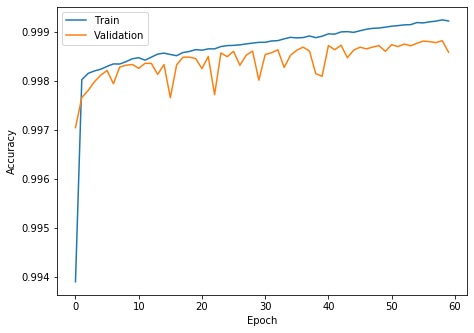

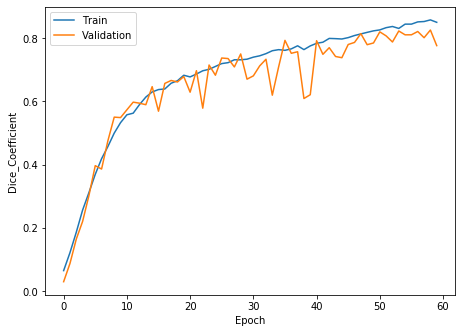

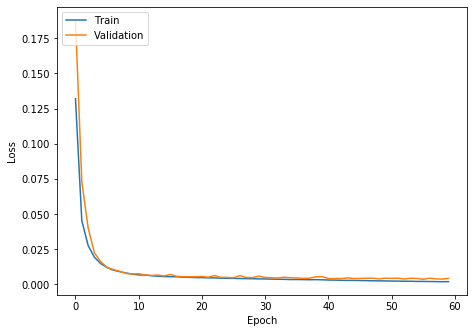

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Accuracy vs Epoch
def Accuracy_Graph(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    #plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
    
# Dice Similarity Coefficient vs Epoch
def Dice_coefficient_Graph(history):

    plt.plot(history.history['dice_coef'])
    plt.plot(history.history['val_dice_coef'])
    #plt.title('Dice_Coefficient')
    plt.ylabel('Dice_Coefficient')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
# Loss vs Epoch
def Loss_Graph(history):

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    #plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
Accuracy_Graph(history)
Dice_coefficient_Graph(history)
Loss_Graph(history)


In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 13 18:56:04 2019

@author: Krishna Chandra
"""
import tensorflow as tf
import keras
from keras.models import Model, load_model
from keras.layers import Input ,BatchNormalization , Activation 
from keras.layers.convolutional import Conv2D, UpSampling2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate


def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x) 
    return x

def model(input_shape):
    
    inputs = Input((input_shape))
    
    conv_1 = Convolution(inputs,32)
    conv_1 = Convolution(inputs,32)
    
    maxp_1 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_1)
    
    conv_2 = Convolution(maxp_1,64)
    conv_2 = Convolution(maxp_1,64)

    maxp_2 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_2)
    
    conv_3 = Convolution(maxp_2,128)
    conv_3 = Convolution(maxp_2,128)
    
    maxp_3 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_3)
    
    conv_4 = Convolution(maxp_3,256)
    conv_4 = Convolution(maxp_3,256)

    maxp_4 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_4)
    
    conv_5 = Convolution(maxp_4,512)
    conv_5 = Convolution(maxp_4,512)
    upsample_6 = UpSampling2D((2, 2)) (conv_5)

    upsample_6 = concatenate([upsample_6, conv_4])
    
    conv_6 = Convolution(upsample_6,256)
    conv_6 = Convolution(upsample_6,256)
    
    upsample_7 = UpSampling2D((2, 2)) (conv_6)
    
    upsample_7 = concatenate([upsample_7, conv_3])
    
    conv_7 = Convolution(upsample_7,128)
    conv_7 = Convolution(upsample_7,128)
    
    upsample_8 = UpSampling2D((2, 2)) (conv_7)
    
    upsample_8 = concatenate([upsample_8, conv_2])

    conv_8 = Convolution(upsample_8,64)
    conv_8 = Convolution(upsample_8,64)

    upsample_9 = UpSampling2D((2, 2)) (conv_8)
    
    upsample_9 = concatenate([upsample_9, conv_1])
    
    conv_9 = Convolution(upsample_9,32)
    conv_9 = Convolution(upsample_9,32)
    outputs = Conv2D(1, (1, 1), activation='sigmoid') (conv_9)
    
    model = Model(inputs=[inputs], outputs=[outputs]) 
    
    return model




In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 13 20:18:06 2019

@author: Krishna Chandra
"""



import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


#import dataPrepare as process
# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual SegmentationX_Dp      =   modality(Path,0)
#import Modified_UNet 
#import plots
#import Metrics

# Setting the path
Path='drive/My Drive/Pre-processed'



# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual Segmentation
X_Dp      =   modality(Path,0)
X_Flair   =   modality(Path,1)
X_Gado    =   modality(Path,2)
X_T1      =   modality(Path,10)
X_T2      =   modality(Path,11)
Y_Manual  =   modality(Path,3)

# Removing the null samples and concatenating the 5 modalities along the 3rd dimension
X, Y = remove_null_samples(X_Dp, X_Flair, X_Gado, X_T1, X_T2, Y_Manual)


# Splitting the Whole data into Training and Testing data
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=32)

# Loding the modified U-net 
model = model(input_shape = (256,256,5))
model.summary()

checkpointer = ModelCheckpoint('Modified_UNet.h5', verbose=1)
callback_list=[checkpointer]

# Compiling the model
k_adam=Adam(lr=0.001)
model.compile(optimizer=k_adam, loss='binary_crossentropy', metrics=['accuracy',dice_coef,precision,sensitivity,specificity])
# Fitting the model over the data
history = model.fit(X_train,Y_train,batch_size=32,epochs=60,validation_split=0.20,verbose=1,initial_epoch=0,callbacks=callback_list)

# Saving the model
model.save('Modified_UNet.h5')
history.history

# Evaluating the model on the training and testing data 
model.evaluate(x=X_train, y=Y_train, batch_size=32 , verbose=1, sample_weight=None, steps=None)
model.evaluate(x=X_test, y=Y_test, batch_size=32, verbose=1, sample_weight=None, steps=None)

# Plotting the Graphs of Accuracy, Dice_coefficient, Loss at each epoch on Training and Testing data
#Accuarcy_Graph(history)
#Dice_coefficient_Graph(history)
#Loss_Graph(history)













Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 5) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 32) 1472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 256, 256, 32) 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 256, 256, 32) 0           batch_normalization_1[0][0]      
_____________

[0.0043177661726720076, 0.99872905, 0.8185155, 0.82937396, 0.890223, 0.9992019]

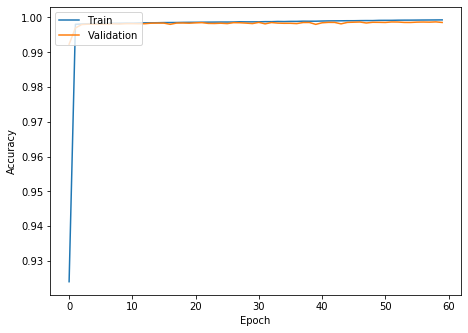

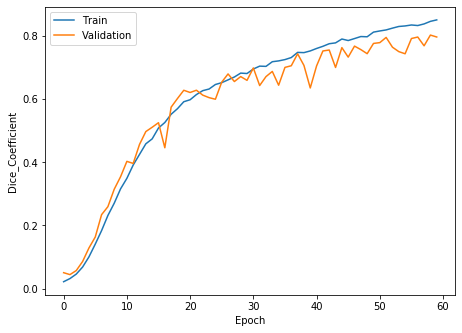

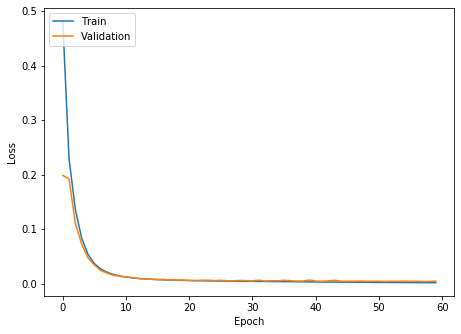

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Accuracy vs Epoch
def Accuracy_Graph(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    #plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
    
# Dice Similarity Coefficient vs Epoch
def Dice_coefficient_Graph(history):

    plt.plot(history.history['dice_coef'])
    plt.plot(history.history['val_dice_coef'])
    #plt.title('Dice_Coefficient')
    plt.ylabel('Dice_Coefficient')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
# Loss vs Epoch
def Loss_Graph(history):

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    #plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
Accuracy_Graph(history)
Dice_coefficient_Graph(history)
Loss_Graph(history)


In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 13 18:52:08 2019

@author: Krishna Chandra
"""

from keras import backend as K
import numpy as np
import tensorflow as tf

# Computing Dice_Coefficient
def dice_coef(y_true, y_pred, smooth=1.0):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# Computing Precision 
def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

# Computing Sensitivity      
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

# Computing Specificity
def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

In [0]:
import tensorflow as tf
import numpy as np
import os
import nibabel as nib
import cv2 as cv
import matplotlib.pyplot as plt
    
def modality(Path,index):
    X = []
    p=os.listdir(Path) 

    for i in p[:14]:                                                                      # Loading all the folders in the given path
        q = os.listdir(os.path.join(Path,i))     

        x = nib.load(os.path.join(Path,i,q[index]))         
        f = x.get_fdata()
        f = np.asarray(f,'float32')
        
        for j in range(f.shape[2]):                                                        # Processing the MRI Scan in the axial view
            _slice = cv.resize(f[:,:,j],(256,256),interpolation=cv.INTER_NEAREST)             # Resizing the slice to the shape(256,256)
            if(index != 3 and np.sum(_slice) != 0 ):                                           # To check whether the slice is null or not
              #  _slice = _slice / (np.max(_slice) + 0.00001)                               # Normalization
                _slice = (_slice - np.mean(_slice) + 0.00001) / (np.std(_slice) + 0.00001) # Standardization
            elif(index == 3):   # if index = 3, Then it is output mask and we don't normalize or standardize it 
                _slice = np.array(_slice)
                _slice[_slice > 0] = 1.0
            _slice = _slice.T
            _slice = _slice[:,:,np.newaxis]
            X.append(_slice)
    return X

# Removing the null samples as it contains no information
def remove_null_samples(X_Dp, X_Flair, X_Gado, X_T1, X_T2, Y_Manual): 
     
    X=[]
    Y=[]
    
    for i in range(len(X_Dp)):        
        final_slice = np.concatenate((X_Dp[i],X_Flair[i],X_Gado[i],X_T1[i],X_T2[i]), axis = -1)
        if(np.sum(final_slice) != 0):        # checking whether the final slice is empty or not             
            X.append(final_slice)
            Y.append(Y_Manual[i])
 
#   Converting the list into array  
    X=np.array(X,dtype='float32')
    Y=np.array(Y,dtype='float32')
    
    return X,Y

#   To store the data in numpy format    
def store_data(X,Y):
    np.save("X.npy",X)
    np.save("Y.npy",Y)


        

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 13 18:56:04 2019

@author: Krishna Chandra
"""
import tensorflow as tf
#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate


def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x) 
    return x

def model(input_shape):
    
    inputs = Input((input_shape))
    
    conv_1 = Convolution(inputs,32)
    conv_1 = Convolution(conv_1,32)

    
    maxp_1 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_1)
    maxp_1= Dropout(0.4)(maxp_1)
    
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_2)
    maxp_2= Dropout(0.2)(maxp_2)

    conv_3 = Convolution(maxp_2,128)
    conv_3 = Convolution(conv_3,128)
    
    maxp_3 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_3)
    maxp_3= Dropout(0.4)(maxp_3)
    
    conv_4 = Convolution(maxp_3,256)
    maxp_4 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_4)
    maxp_4= Dropout(0.2)(maxp_4)
    
    conv_5 = Convolution(maxp_4,512)
    conv_5 = Convolution(conv_5,512)
    upsample_6 = UpSampling2D((2, 2)) (conv_5)

    upsample_6 = concatenate([upsample_6, conv_4])
    
    conv_6 = Convolution(upsample_6,256)
    
    upsample_7 = UpSampling2D((2, 2)) (conv_6)
    
    upsample_7 = concatenate([upsample_7, conv_3])
    
    conv_7 = Convolution(upsample_7,128)
    conv_7 = Convolution(conv_7,128)
    upsample_8 = UpSampling2D((2, 2)) (conv_7)
    
    upsample_8 = concatenate([upsample_8, conv_2])

    conv_8 = Convolution(upsample_8,64)
    upsample_9 = UpSampling2D((2, 2)) (conv_8)
    
    upsample_9 = concatenate([upsample_9, conv_1])
    
    conv_9 = Convolution(upsample_9,32)
    conv_9 = Convolution(conv_9,32)
    outputs = Conv2D(1, (1, 1), activation='sigmoid') (conv_9)
    
    model = Model(inputs=[inputs], outputs=[outputs]) 
    
    return model




In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 13 20:18:06 2019

@author: Krishna Chandra
"""



import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


#import dataPrepare as process
# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual SegmentationX_Dp      =   modality(Path,0)
#import Modified_UNet 
#import plots
#import Metrics

# Setting the path
Path='drive/My Drive/Pre-processed'



# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual Segmentation
X_Dp      =   modality(Path,0)
X_Flair   =   modality(Path,1)
X_Gado    =   modality(Path,2)
X_T1      =   modality(Path,10)
X_T2      =   modality(Path,11)
Y_Manual  =   modality(Path,3)

# Removing the null samples and concatenating the 5 modalities along the 3rd dimension
X, Y = remove_null_samples(X_Dp, X_Flair, X_Gado, X_T1, X_T2, Y_Manual)


# Splitting the Whole data into Training and Testing data
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=32)

# Loding the modified U-net 
model = model(input_shape = (256,256,5))
model.summary()

checkpointer = ModelCheckpoint('Modified_UNet.h5', verbose=1)
callback_list=[checkpointer]

# Compiling the model
k_adam=Adam(lr=0.001)
model.compile(optimizer=k_adam, loss='binary_crossentropy', metrics=['accuracy',dice_coef,precision,sensitivity,specificity])
# Fitting the model over the data
history = model.fit(X_train,Y_train,batch_size=32,epochs=60,validation_split=0.20,verbose=1,initial_epoch=0,callbacks=callback_list)

# Saving the model
model.save('Modified_UNet.h5')
history.history

# Evaluating the model on the training and testing data 
model.evaluate(x=X_train, y=Y_train, batch_size=32 , verbose=1, sample_weight=None, steps=None)
model.evaluate(x=X_test, y=Y_test, batch_size=32, verbose=1, sample_weight=None, steps=None)

# Plotting the Graphs of Accuracy, Dice_coefficient, Loss at each epoch on Training and Testing data
#Accuarcy_Graph(history)
#Dice_coefficient_Graph(history)
#Loss_Graph(history)













Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 5) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 1472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 32) 0           batch_normalization[0][0]        
_____________

In [0]:

import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras


def unet(pretrained_weights = None,input_size = (256,256,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

# **UNION MODEL RESULTS**

In [0]:


import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


#import dataPrepare as process
# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual SegmentationX_Dp      =   modality(Path,0)
#import Modified_UNet 
#import plots
#import Metrics

# Setting the path
Path='drive/My Drive/Pre-processed'



# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual Segmentation
X_Dp      =   modality(Path,0)
X_Flair   =   modality(Path,1)
X_Gado    =   modality(Path,2)
X_T1      =   modality(Path,10)
X_T2      =   modality(Path,11)
Y_Manual  =   modality(Path,3)

# Removing the null samples and concatenating the 5 modalities along the 3rd dimension
X, Y = remove_null_samples(X_Dp, X_Flair, X_Gado, X_T1, X_T2, Y_Manual)


# Splitting the Whole data into Training and Testing data
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=32)

# Loding the modified U-net 
model = unet(input_size = (256,256,5))
model.summary()

checkpointer = ModelCheckpoint('Modified_UNet.h5', verbose=1)
callback_list=[checkpointer]

# Compiling the model
k_adam=Adam(lr=0.001)
model.compile(optimizer=k_adam, loss='binary_crossentropy', metrics=['accuracy',dice_coef,precision,sensitivity,specificity])
# Fitting the model over the data
history = model.fit(X_train,Y_train,batch_size=32,epochs=60,validation_split=0.20,verbose=1,initial_epoch=0,callbacks=callback_list)

# Saving the model
model.save('Modified_UNet.h5')
history.history

# Evaluating the model on the training and testing data 
model.evaluate(x=X_train, y=Y_train, batch_size=32 , verbose=1, sample_weight=None, steps=None)
model.evaluate(x=X_test, y=Y_test, batch_size=32, verbose=1, sample_weight=None, steps=None)

# Plotting the Graphs of Accuracy, Dice_coefficient, Loss at each epoch on Training and Testing data
#Accuarcy_Graph(history)
#Dice_coefficient_Graph(history)
#Loss_Graph(history)

AttributeError: ignored

# **UNION MODEL RESULTS**

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 13 18:52:08 2019

@author: Krishna Chandra
"""

from keras import backend as K
import numpy as np
import tensorflow as tf

# Computing Dice_Coefficient
def dice_coef(y_true, y_pred, smooth=1.0):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# Computing Precision 
def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

# Computing Sensitivity      
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

# Computing Specificity
def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

Using TensorFlow backend.


In [0]:
def remove_null_samples(X_Dp, X_Flair, X_Gado, X_T1, X_T2, Y_1, Y_2, Y_3, Y_4, Y_5, Y_6, Y_7): 
     
    X=[]
    Y_a1=[]
    Y_a2=[]
    Y_a3=[]
    Y_a4=[]
    Y_a5=[]
    Y_a6=[]
    Y_a7=[]

    for i in range(len(X_Dp)):        
        final_slice = np.concatenate((X_Dp[i],X_Flair[i],X_Gado[i],X_T1[i],X_T2[i]), axis = -1)
        if(np.sum(final_slice) != 0):        # checking whether the final slice is empty or not             
            X.append(final_slice)
            Y_a1.append(Y_1[i])
            Y_a2.append(Y_2[i])
            Y_a3.append(Y_3[i])
            Y_a4.append(Y_4[i])
            Y_a5.append(Y_5[i])
            Y_a6.append(Y_6[i])
            Y_a7.append(Y_7[i])
 
#   Converting the list into array  
    X=np.array(X,dtype='float32')
    Y_1=np.array(Y_a1,dtype='float32')
    Y_2=np.array(Y_a2,dtype='float32')
    Y_3=np.array(Y_a3,dtype='float32')
    Y_4=np.array(Y_a4,dtype='float32')
    Y_5=np.array(Y_a5,dtype='float32')
    Y_6=np.array(Y_a6,dtype='float32')
    Y_7=np.array(Y_a7,dtype='float32')
    
    

    
    return X,Y_1,Y_2,Y_3,Y_4,Y_5,Y_6,Y_7


#   To store the data in numpy format   

In [0]:
import tensorflow as tf
import numpy as np
import os
import nibabel as nib
import cv2 as cv
import matplotlib.pyplot as plt
    
def modality(Path,index):
    X = []
    p=os.listdir(Path) 

    for i in p[:14]:                                                                      # Loading all the folders in the given path
        q = os.listdir(os.path.join(Path,i))     

        x = nib.load(os.path.join(Path,i,q[index]))         
        f = x.get_fdata()
        f = np.asarray(f,'float32')
        
        for j in range(f.shape[2]):                                                        # Processing the MRI Scan in the axial view
            _slice = cv.resize(f[:,:,j],(256,256),interpolation=cv.INTER_NEAREST)             # Resizing the slice to the shape(256,256)
            if(index not in [3,4,5,6,7,8,9] and np.sum(_slice) != 0 ):  
                print("DONE")                                         # To check whether the slice is null or not
              #  _slice = _slice / (np.max(_slice) + 0.00001)                               # Normalization
                _slice = (_slice - np.mean(_slice) + 0.00001) / (np.std(_slice) + 0.00001) # Standardization
            elif(index in [3,4,5,6,7,8,9]):   # if index = 3, Then it is output mask and we don't normalize or standardize it 
                _slice = np.array(_slice)
                _slice[_slice > 0] = 1.0
                _slice[_slice < 0] = 0.0
            _slice = _slice.T
            _slice = _slice[:,:,np.newaxis]
            X.append(_slice)
   # X=np.array(X,dtype='float32')
    return X

In [0]:
import tensorflow as tf
import numpy as np

import keras
from keras.models import Model, load_model
from keras.layers import Input ,BatchNormalization , Activation 
from keras.layers.convolutional import Conv2D, UpSampling2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate


def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x) 
    return x

def model(input_shape):
    
    inputs = Input((input_shape))
    
    conv_1 = Convolution(inputs,32)
    
    maxp_1 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_1)
    
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_2)
    
    conv_3 = Convolution(maxp_2,128)
    
    maxp_3 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_3)
    
    conv_4 = Convolution(maxp_3,256)
    maxp_4 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_4)
    
    conv_5 = Convolution(maxp_4,512)
   
    upsample_6 = UpSampling2D((2, 2)) (conv_5)

    upsample_6 = concatenate([upsample_6, conv_4])
    
    conv_6 = Convolution(upsample_6,256)
    upsample_7 = UpSampling2D((2, 2)) (conv_6)
    
    upsample_7 = concatenate([upsample_7, conv_3])
    
    conv_7 = Convolution(upsample_7,128)
    upsample_8 = UpSampling2D((2, 2)) (conv_7)
    
    upsample_8 = concatenate([upsample_8, conv_2])

    conv_8 = Convolution(upsample_8,64)
    upsample_9 = UpSampling2D((2, 2)) (conv_8)
    
    upsample_9 = concatenate([upsample_9, conv_1])
    
    conv_9 = Convolution(upsample_9,32)
    outputs = Conv2D(1, (1, 1), activation='sigmoid') (conv_9)
    
    model = Model(inputs=[inputs], outputs=[outputs]) 
    
    return model



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


#import dataPrepare as process
# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual SegmentationX_Dp      =   modality(Path,0)
#import Modified_UNet 
#import plots
#import Metrics

# Setting the path
Path='drive/My Drive/Pre-processed'



# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual Segmentation
X_Dp_t      =   modality(Path,0)
X_Flair_t   =   modality(Path,1)
X_Gado_t    =   modality(Path,2)
X_T1_t      =   modality(Path,10)
X_T2_t      =   modality(Path,11)


In [0]:

Y_1  =   modality(Path,3)
Y_2  =   modality(Path,4)
Y_3  =   modality(Path,5)
Y_4  =   modality(Path,6)
Y_5  =   modality(Path,7)
Y_6  =   modality(Path,8)
Y_7  =   modality(Path,9)

In [0]:
def store_data(X,Y):
    np.save("drive/My Drive/MS_data/X_union_new.npy",X)
    np.save("drive/My Drive/MS_data/Y_union_new.npy",Y)




In [0]:
X, Y_a1,Y_a2,Y_a3,Y_a4,Y_a5,Y_a6,Y_a7 = remove_null_samples(X_Dp_t, X_Flair_t, X_Gado_t, X_T1_t, X_T2_t, Y_1,Y_2,Y_3,Y_4,Y_5,Y_6,Y_7)

In [0]:
import math
def union(Y_1,Y_2,Y_3,Y_4,Y_5,Y_6,Y_7):
  Y=[]
  sum2=[]
  flag=0
  #y=np.array()
  print("A")
  for i in range (len(Y_1)):
    #print(Y_1[i])
    
        f=np.concatenate((Y_1[i],Y_2[i],Y_3[i],Y_4[i],Y_5[i],Y_6[i],Y_7[i]),axis=-1)
        sum=np.sum(f,axis=2)
       # print(sum)
        
          #print(j)
        sum_1=np.divide(sum,7)
        sum_1=np.ceil(sum_1)
        sum2.append(sum_1)

    #sum2=np.array(sum2,dtype='float32')
    
        
  return sum2

In [0]:
Y_Manual=union(Y_1,Y_2,Y_3,Y_4,Y_5,Y_6,Y_7)

A


In [0]:
def remove_null_samples_2(X_Dp, X_Flair, X_Gado, X_T1, X_T2, Y_Manual): 
     
    X=[]
    Y=[]
    
    for i in range(len(X_Dp)):        
        final_slice = np.concatenate((X_Dp[i],X_Flair[i],X_Gado[i],X_T1[i],X_T2[i]), axis = -1)
        if(np.sum(final_slice) != 0):        # checking whether the final slice is empty or not             
            X.append(final_slice)
            Y.append(Y_Manual[i])
 
#   Converting the list into array  
    X=np.array(X,dtype='float32')
    Y=np.array(Y,dtype='float32')
    
    return X,Y


#   To store the data in numpy for

In [0]:
Y_manual=np.load("drive/My Drive/MS_data/Y_manual_new.npy")

In [0]:
print(np.max(Y_manual))
print(np.min(Y_manual))

1.0
0.0


In [0]:
X, Y = remove_null_samples_2(X_Dp_t, X_Flair_t, X_Gado_t, X_T1_t, X_T2_t, Y_manual)

In [0]:
store_data(X,Y)

In [0]:
Y=np.array(Y_Manual,dtype='float32')
np.save("drive/My Drive/MS_data/Y_manual_new.npy",Y)


In [0]:
Y_Manual_1=np.array(Y,dtype='float32')
print(np.min(Y_Manual_1))

print(np.max(Y_Manual_1))

0.0
1.0


In [0]:
import numpy as np
#X=np.load("drive/My Drive/MS_data/X_union_new.npy")
Y=np.load("drive/My Drive/MS_data/Y_union_new.npy")


In [0]:
print(np.min(Y))

print(np.max(Y))

0.0
1.0


In [0]:
Y_Manual=list(Y)

In [0]:
Y_1=Y_Manual[:1401]
Y_2=Y_Manual[1401:]

In [0]:
Y_A_1=np.array(Y_1,dtype='float32')
Y_A_2=np.array(Y_2,dtype='float32')

In [0]:
print(np.min(Y_A_1))
print(np.min(Y_A_2))
print(np.max(Y_A_1))
print(np.max(Y_A_2))

0.0
0.0
1.0
1.0


In [0]:
p=[]
y=[]
z=[]
a=[]
n=1
for i in Y_1:
  print(n)
  for j in i:
    for k in j:
      #print(k)
      a.append(k)
     # print(a)
      z.append(a)
      a=[]
    #print(z)
    y.append(z)
    z=[]
  p.append(y)
  y=[]
  n+=1


#print(p)

      

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [0]:
temp=np.array(p)
np.save("drive/My Drive/MS_data/temp_1_new.npy",temp)

In [0]:
q=[]
y=[]
z=[]
a=[]
n=1401
for i in Y_2:
  print(n)
  for j in i:
    for k in j:
      #print(k)
      a.append(k)
     # print(a)
      z.append(a)
      a=[]
    #print(z)
    y.append(z)
    z=[]
  q.append(y)
  y=[]
  n+=1


1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1448
1449
1450
1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600


In [0]:
temp2=np.array(q)
np.save("drive/My Drive/MS_data/temp_2_new.npy",temp2)

In [0]:
temp=np.load("drive/My Drive/MS_data/temp_1_new.npy")
p=list(temp)

In [0]:
temp2=np.load("drive/My Drive/MS_data/temp_2_new.npy")
q=list(temp2)

In [0]:
print(np.max(temp))
print(np.min(temp))

1.0
0.0


In [0]:
j=1401
for i in q:
  print(j)
  p.append(i)
  j+=1


1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1448
1449
1450
1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600


In [0]:
np.save("drive/My Drive/MS_data/Y_Manual_2_new.npy",p)

In [0]:
import numpy as np

Y=np.load("drive/My Drive/MS_data/Y_Manual_2_new.npy")
X=np.load("drive/My Drive/MS_data/X_union_new.npy")

In [0]:
print(np.max(Y))
print(np.min(Y))

1.0
0.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=32)
#print(X_train)
print(X_test)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
#print(Y_train)
print(Y_test)
# Loding the modified U-net 

[[[[-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]
   [-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]
   [-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]
   ...
   [-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]
   [-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]
   [-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]]

  [[-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]
   [-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]
   [-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]
   ...
   [-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]
   [-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]
   [-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]]

  [[-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]
   [-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]
   [-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]
   ...


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
model = model(input_shape = (256,256,5))
model.summary()

checkpointer = ModelCheckpoint('drive/My Drive/MS_data/Modified_UNet_union.h5', verbose=1)
callback_list=[checkpointer]

# Compiling the model
k_adam=Adam(lr=0.001)
model.compile(optimizer=k_adam, loss='binary_crossentropy', metrics=['accuracy',dice_coef,precision,sensitivity,specificity])
# Fitting the model over the data
history = model.fit(X_train,Y_train,batch_size=32,epochs=60,validation_split=0.20,verbose=1,initial_epoch=0,callbacks=callback_list)

# Saving the model
model.save('drive/My Drive/MS_data/Modified_UNet_union.h5')
history.history

# Evaluating the model on the training and testing data 
model.evaluate(x=X_train, y=Y_train, batch_size=32 , verbose=1, sample_weight=None, steps=None)
model.evaluate(x=X_test, y=Y_test, batch_size=32, verbose=1, sample_weight=None, steps=None)

# Plotting the Graphs of Accuracy, Dice_coefficient, Loss at each epoch on Training and Testing data
#Accuarcy_Graph(history)
#Dice_coefficient_Graph(history)
#Loss_Graph(history)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 5) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 1472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 32) 0           batch_normalization[0][0]        
_____________

[0.0001237945782572143,
 0.9999776,
 0.99982345,
 0.9999937,
 0.99990654,
 0.99999815]

# **INTERSECTION CODE RESULTS**

In [0]:
import tensorflow as tf
import numpy as np
import os
import nibabel as nib
import cv2 as cv
import matplotlib.pyplot as plt
    
def modality(Path,index):
    X = []
    p=os.listdir(Path) 

    for i in p[:14]:                                                                      # Loading all the folders in the given path
        q = os.listdir(os.path.join(Path,i))     

        x = nib.load(os.path.join(Path,i,q[index]))         
        f = x.get_fdata()
        f = np.asarray(f,'float32')
        
        for j in range(f.shape[2]):                                                        # Processing the MRI Scan in the axial view
            _slice = cv.resize(f[:,:,j],(256,256),interpolation=cv.INTER_NEAREST)             # Resizing the slice to the shape(256,256)
            if(index not in [3,4,5,6,7,8,9] and np.sum(_slice) != 0 ):  
                print("DONE")                                         # To check whether the slice is null or not
              #  _slice = _slice / (np.max(_slice) + 0.00001)                               # Normalization
                _slice = (_slice - np.mean(_slice) + 0.00001) / (np.std(_slice) + 0.00001) # Standardization
            elif(index in [3,4,5,6,7,8,9]):   # if index = 3, Then it is output mask and we don't normalize or standardize it 
                _slice = np.array(_slice)
                _slice[_slice > 0] = 1.0
                _slice[_slice < 0] = 0.0
            _slice = _slice.T
            _slice = _slice[:,:,np.newaxis]
            X.append(_slice)
   # X=np.array(X,dtype='float32')
    return X

In [14]:
from keras import backend as K
import numpy as np
import tensorflow as tf

# Computing Dice_Coefficient
def dice_coef(y_true, y_pred, smooth=1.0):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# Computing Precision 
def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

# Computing Sensitivity      
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

# Computing Specificity
def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

Using TensorFlow backend.


In [0]:
def remove_null_samples(X_Dp, X_Flair, X_Gado, X_T1, X_T2, Y_Manual): 
     
    X=[]
    Y=[]
    
    for i in range(len(X_Dp)):        
        final_slice = np.concatenate((X_Dp[i],X_Flair[i],X_Gado[i],X_T1[i],X_T2[i]), axis = -1)
        if(np.sum(final_slice) != 0):        # checking whether the final slice is empty or not             
            X.append(final_slice)
            Y.append(Y_Manual[i])
 
#   Converting the list into array  
    X=np.array(X,dtype='float32')
    Y=np.array(Y,dtype='float32')
    
    return X,Y


#   To store the data in num

In [0]:
import tensorflow as tf
import numpy as np

import keras
from keras.models import Model, load_model
from keras.layers import Input ,BatchNormalization , Activation 
from keras.layers.convolutional import Conv2D, UpSampling2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate


def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x) 
    return x

def model(input_shape):
    
    inputs = Input((input_shape))
    
    conv_1 = Convolution(inputs,32)
    
    maxp_1 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_1)
    
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_2)
    
    conv_3 = Convolution(maxp_2,128)
    
    maxp_3 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_3)
    
    conv_4 = Convolution(maxp_3,256)
    maxp_4 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_4)
    
    conv_5 = Convolution(maxp_4,512)
   
    upsample_6 = UpSampling2D((2, 2)) (conv_5)

    upsample_6 = concatenate([upsample_6, conv_4])
    
    conv_6 = Convolution(upsample_6,256)
    upsample_7 = UpSampling2D((2, 2)) (conv_6)
    
    upsample_7 = concatenate([upsample_7, conv_3])
    
    conv_7 = Convolution(upsample_7,128)
    upsample_8 = UpSampling2D((2, 2)) (conv_7)
    
    upsample_8 = concatenate([upsample_8, conv_2])

    conv_8 = Convolution(upsample_8,64)
    upsample_9 = UpSampling2D((2, 2)) (conv_8)
    
    upsample_9 = concatenate([upsample_9, conv_1])
    
    conv_9 = Convolution(upsample_9,32)
    outputs = Conv2D(1, (1, 1), activation='sigmoid') (conv_9)
    
    model = Model(inputs=[inputs], outputs=[outputs]) 
    
    return model


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


#import dataPrepare as process
# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual SegmentationX_Dp      =   modality(Path,0)
#import Modified_UNet 
#import plots
#import Metrics

# Setting the path
Path='drive/My Drive/Pre-processed'



# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual Segmentation
Y_1  =   modality(Path,3)
Y_2  =   modality(Path,4)
Y_3  =   modality(Path,5)
Y_4  =   modality(Path,6)
Y_5  =   modality(Path,7)
Y_6  =   modality(Path,8)
Y_7  =   modality(Path,9)

In [0]:
import math
def intersection(Y_1,Y_2,Y_3,Y_4,Y_5,Y_6,Y_7):
  Y=[]
  sum2=[]
  flag=0
  #y=np.array()
  print("A")
  for i in range (len(Y_1)):
    #print(Y_1[i])
    
        f=np.concatenate((Y_1[i],Y_2[i],Y_3[i],Y_4[i],Y_5[i],Y_6[i],Y_7[i]),axis=-1)
        sum=np.sum(f,axis=2)
       # print(sum)
        
          #print(j)
        sum_1=np.divide(sum,7)
        sum_1=np.floor(sum_1)
        sum2.append(sum_1)

    #sum2=np.array(sum2,dtype='float32')
    
        
  return sum2
      

In [0]:
Y_Manual=intersection(Y_1,Y_2,Y_3,Y_4,Y_5,Y_6,Y_7)


print(len(Y_Manual))

A
5184


In [0]:
Y=np.array(Y_Manual,dtype='float32')
np.save("drive/My Drive/MS_data/Y_manual_intersection.npy",Y)

In [0]:
Y=np.load("drive/My Drive/MS_data/Y_manual_intersection.npy")

In [0]:
Path='drive/My Drive/Pre-processed'
X_Dp_t      =   modality(Path,0)
X_Flair_t   =   modality(Path,1)
X_Gado_t    =   modality(Path,2)
X_T1_t      =   modality(Path,10)
X_T2_t      =   modality(Path,11)


Streaming output truncated to the last 5000 lines.
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE

In [0]:
Y_Manual=list(Y)

In [0]:
X, Y = remove_null_samples(X_Dp_t, X_Flair_t, X_Gado_t, X_T1_t, X_T2_t, Y_Manual)

In [0]:
def store_data(X,Y):
    np.save("drive/My Drive/MS_data/X_intersection.npy",X)
    np.save("drive/My Drive/MS_data/Y_intersection.npy",Y)

In [0]:
print(len(Y))
store_data(X,Y)

2940


In [0]:
import numpy as np
#X=np.load("drive/My Drive/MS_data/X_intersection.npy")
Y=np.load("drive/My Drive/MS_data/Y_intersection.npy")



In [0]:
Y_1=Y[:1401]
Y_2=Y[1401:]


In [0]:
p=[]
y=[]
z=[]
a=[]
n=1
for i in Y_1:
  print(n)
  for j in i:
    for k in j:
      #print(k)
      a.append(k)
     # print(a)
      z.append(a)
      a=[]
    #print(z)
    y.append(z)
    z=[]
  p.append(y)
  y=[]
  n+=1


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [0]:
temp=np.array(p)
np.save("drive/My Drive/MS_data/temp_1_in.npy",temp)

In [4]:
q=[]
y=[]
z=[]
a=[]
n=1401
for i in Y_2:
  print(n)
  for j in i:
    for k in j:
      #print(k)
      a.append(k)
     # print(a)
      z.append(a)
      a=[]
    #print(z)
    y.append(z)
    z=[]
  q.append(y)
  y=[]
  n+=1

1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1448
1449
1450
1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600


In [0]:
temp2=np.array(q)
np.save("drive/My Drive/MS_data/temp_2_in.npy",temp2)

In [0]:
import numpy as np

temp=np.load("drive/My Drive/MS_data/temp_1_in.npy")

In [0]:
q=list(temp2)

In [0]:
p=list(temp)

In [10]:
j=1401
for i in q:
  print(j)
  p.append(i)
  j+=1

1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1448
1449
1450
1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600


In [0]:
np.save("drive/My Drive/MS_data/Y_Manual_in_2.npy",p)
Y=np.load("drive/My Drive/MS_data/Y_Manual_in_2.npy")
X=np.load("drive/My Drive/MS_data/X_intersection.npy")

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=32)
#print(X_train)
#print(X_test)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
#print(Y_train)
#print(Y_test)
# Loding the modified U-net 

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
model = model(input_shape = (256,256,5))
model.summary()

checkpointer = ModelCheckpoint('drive/My Drive/MS_data/Modified_UNet_intersection.h5', verbose=1)
callback_list=[checkpointer]

# Compiling the model
k_adam=Adam(lr=0.001)
model.compile(optimizer=k_adam, loss='binary_crossentropy', metrics=['accuracy',dice_coef,precision,sensitivity,specificity])
# Fitting the model over the data
history = model.fit(X_train,Y_train,batch_size=32,epochs=60,validation_split=0.20,verbose=1,initial_epoch=0,callbacks=callback_list)

# Saving the model
model.save('drive/My Drive/MS_data/Modified_UNet.h5')
history.history

# Evaluating the model on the training and testing data 
model.evaluate(x=X_train, y=Y_train, batch_size=32 , verbose=1, sample_weight=None, steps=None)
model.evaluate(x=X_test, y=Y_test, batch_size=32, verbose=1, sample_weight=None, steps=None)

# Plotting the Graphs of Accuracy, Dice_coefficient, Loss at each epoch on Training and Testing data
#Accuarcy_Graph(history)
#Dice_coefficient_Graph(history)
#Loss_Graph(history)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 5) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 1472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 32) 0           batch_normalization[0][0]        
_____________

[0.001962868071503329, 0.999233, 0.77337795, 0.7836261, 0.85580677, 0.99952596]

# **MAJORITY MODEL RESULTS**

In [3]:
import tensorflow as tf
import numpy as np
import os
import nibabel as nib
import cv2 as cv
import matplotlib.pyplot as plt
    
def modality(Path,index):
    X = []
    p=os.listdir(Path) 

    for i in p[:14]:                                                                      # Loading all the folders in the given path
        q = os.listdir(os.path.join(Path,i))     

        x = nib.load(os.path.join(Path,i,q[index]))         
        f = x.get_fdata()
        f = np.asarray(f,'float32')
        
        for j in range(f.shape[2]):                                                        # Processing the MRI Scan in the axial view
            _slice = cv.resize(f[:,:,j],(256,256),interpolation=cv.INTER_NEAREST)             # Resizing the slice to the shape(256,256)
            if(index not in [3,4,5,6,7,8,9] and np.sum(_slice) != 0 ):  
                print("DONE")                                         # To check whether the slice is null or not
              #  _slice = _slice / (np.max(_slice) + 0.00001)                               # Normalization
                _slice = (_slice - np.mean(_slice) + 0.00001) / (np.std(_slice) + 0.00001) # Standardization
            elif(index in [3,4,5,6,7,8,9]):   # if index = 3, Then it is output mask and we don't normalize or standardize it 
                _slice = np.array(_slice)
                _slice[_slice > 0] = 1.0
                _slice[_slice < 0] = 0.0
            _slice = _slice.T
            _slice = _slice[:,:,np.newaxis]
            X.append(_slice)
   # X=np.array(X,dtype='float32')
    return X

In [13]:
from keras import backend as K
import numpy as np
import tensorflow as tf

# Computing Dice_Coefficient
def dice_coef(y_true, y_pred, smooth=1.0):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# Computing Precision 
def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

# Computing Sensitivity      
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

# Computing Specificity
def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

Using TensorFlow backend.


In [0]:
def remove_null_samples(X_Dp, X_Flair, X_Gado, X_T1, X_T2, Y_Manual): 
     
    X=[]
    Y=[]
    
    for i in range(len(X_Dp)):        
        final_slice = np.concatenate((X_Dp[i],X_Flair[i],X_Gado[i],X_T1[i],X_T2[i]), axis = -1)
        if(np.sum(final_slice) != 0):        # checking whether the final slice is empty or not             
            X.append(final_slice)
            Y.append(Y_Manual[i])
 
#   Converting the list into array  
    X=np.array(X,dtype='float32')
    Y=np.array(Y,dtype='float32')
    
    return X,Y


In [0]:
import tensorflow as tf
import numpy as np

import keras
from keras.models import Model, load_model
from keras.layers import Input ,BatchNormalization , Activation 
from keras.layers.convolutional import Conv2D, UpSampling2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate


def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x) 
    return x

def model(input_shape):
    
    inputs = Input((input_shape))
    
    conv_1 = Convolution(inputs,32)
    
    maxp_1 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_1)
    
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_2)
    
    conv_3 = Convolution(maxp_2,128)
    
    maxp_3 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_3)
    
    conv_4 = Convolution(maxp_3,256)
    maxp_4 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_4)
    
    conv_5 = Convolution(maxp_4,512)
   
    upsample_6 = UpSampling2D((2, 2)) (conv_5)

    upsample_6 = concatenate([upsample_6, conv_4])
    
    conv_6 = Convolution(upsample_6,256)
    upsample_7 = UpSampling2D((2, 2)) (conv_6)
    
    upsample_7 = concatenate([upsample_7, conv_3])
    
    conv_7 = Convolution(upsample_7,128)
    upsample_8 = UpSampling2D((2, 2)) (conv_7)
    
    upsample_8 = concatenate([upsample_8, conv_2])

    conv_8 = Convolution(upsample_8,64)
    upsample_9 = UpSampling2D((2, 2)) (conv_8)
    
    upsample_9 = concatenate([upsample_9, conv_1])
    
    conv_9 = Convolution(upsample_9,32)
    outputs = Conv2D(1, (1, 1), activation='sigmoid') (conv_9)
    
    model = Model(inputs=[inputs], outputs=[outputs]) 
    
    return model

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


#import dataPrepare as process
# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual SegmentationX_Dp      =   modality(Path,0)
#import Modified_UNet 
#import plots
#import Metrics

# Setting the path
Path='drive/My Drive/Pre-processed'



# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual Segmentation
Y_1  =   modality(Path,3)
Y_2  =   modality(Path,4)
Y_3  =   modality(Path,5)
Y_4  =   modality(Path,6)
Y_5  =   modality(Path,7)
Y_6  =   modality(Path,8)
Y_7  =   modality(Path,9)

In [0]:
import math
def Major(Y_1,Y_2,Y_3,Y_4,Y_5,Y_6,Y_7):
  Y=[]
  sum2=[]
  flag=0
  #y=np.array()
  print("A")
  for i in range (len(Y_1)):
    #print(Y_1[i])
    
        f=np.concatenate((Y_1[i],Y_2[i],Y_3[i],Y_4[i],Y_5[i],Y_6[i],Y_7[i]),axis=-1)
        sum=np.sum(f,axis=2)
       # print(sum)
        
          #print(j)
        sum_1=np.divide(sum,4)
        sum_1=np.floor(sum_1)
        sum2.append(sum_1)

    #sum2=np.array(sum2,dtype='float32')
    
        
  return sum2
      

In [6]:
Y_Manual=Major(Y_1,Y_2,Y_3,Y_4,Y_5,Y_6,Y_7)


print(len(Y_Manual))

A
5184


In [0]:
Y=np.array(Y_Manual,dtype='float32')
np.save("drive/My Drive/MS_data/Y_manual_Major.npy",Y)

In [0]:
# Setting the path
Path='drive/My Drive/Pre-processed'
X_Dp_t      =   modality(Path,0)
X_Flair_t   =   modality(Path,1)
X_Gado_t    =   modality(Path,2)
X_T1_t      =   modality(Path,10)
X_T2_t      =   modality(Path,11)


In [0]:

Y=np.load("drive/My Drive/MS_data/Y_manual_Major.npy")
Y_Manual=list(Y)

In [0]:
X, Y = remove_null_samples(X_Dp_t, X_Flair_t, X_Gado_t, X_T1_t, X_T2_t, Y_Manual)

In [0]:
def store_data(X,Y):
    np.save("drive/My Drive/MS_data/X_Major.npy",X)
    np.save("drive/My Drive/MS_data/Y_Major.npy",Y)

In [11]:
print(len(Y))
store_data(X,Y)

2940


In [0]:
import numpy as np
#X=np.load("drive/My Drive/MS_data/X_Major.npy")
Y=np.load("drive/My Drive/MS_data/Y_Major.npy")


In [0]:
Y=list(Y)

In [0]:
Y_1=Y[:1401]
Y_2=Y[1401:]


In [14]:
p=[]
y=[]
z=[]
a=[]
n=1
for i in Y_1:
  print(n)
  for j in i:
    for k in j:
      #print(k)
      a.append(k)
     # print(a)
      z.append(a)
      a=[]
    #print(z)
    y.append(z)
    z=[]
  p.append(y)
  y=[]
  n+=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [0]:
temp=np.array(p)
np.save("drive/My Drive/MS_data/temp_1_maj.npy",temp)

In [4]:
q=[]
y=[]
z=[]
a=[]
n=1401
for i in Y_2:
  print(n)
  for j in i:
    for k in j:
      #print(k)
      a.append(k)
     # print(a)
      z.append(a)
      a=[]
    #print(z)
    y.append(z)
    z=[]
  q.append(y)
  y=[]
  n+=1

1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1448
1449
1450
1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600


In [0]:
temp2=np.array(q)
np.save("drive/My Drive/MS_data/temp_2_maj.npy",temp2)

In [0]:
q=list(temp2)

In [0]:
temp=np.load("drive/My Drive/MS_data/temp_1_maj.npy")

In [0]:
p=list(temp)

In [9]:
j=1401
for i in q:
  print(j)
  p.append(i)
  j+=1

1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1448
1449
1450
1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600


In [0]:
np.save("drive/My Drive/MS_data/Y_Manual_major_2.npy",p)
Y=np.load("drive/My Drive/MS_data/Y_Manual_major_2.npy")
X=np.load("drive/My Drive/MS_data/X_Major.npy")

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=32)
#print(X_train)
#print(X_test)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
#print(Y_train)
#print(Y_test)
# Loding the modified U-net 

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
model = model(input_shape = (256,256,5))
model.summary()

checkpointer = ModelCheckpoint('drive/My Drive/MS_data/Modified_UNet_union.h5', verbose=1)
callback_list=[checkpointer]

# Compiling the model
k_adam=Adam(lr=0.001)
model.compile(optimizer=k_adam, loss='binary_crossentropy', metrics=['accuracy',dice_coef,precision,sensitivity,specificity])
# Fitting the model over the data
history = model.fit(X_train,Y_train,batch_size=32,epochs=60,validation_split=0.20,verbose=1,initial_epoch=0,callbacks=callback_list)

# Saving the model
model.save('drive/My Drive/MS_data/Modified_UNet.h5')
history.history

# Evaluating the model on the training and testing data 
model.evaluate(x=X_train, y=Y_train, batch_size=32 , verbose=1, sample_weight=None, steps=None)
model.evaluate(x=X_test, y=Y_test, batch_size=32, verbose=1, sample_weight=None, steps=None)

# Plotting the Graphs of Accuracy, Dice_coefficient, Loss at each epoch on Training and Testing data
#Accuarcy_Graph(history)
#Dice_coefficient_Graph(history)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 5) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 1472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 32) 0           batch_normalization[0][0]        
_____________

[0.005795290116051765, 0.99828, 0.82804215, 0.86342204, 0.84253913, 0.999209]